In [5]:
%pip install opencv-python
%pip install pillow
%pip install numpy
%pip install scipy

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 38.6/38.6 MB 6.5 MB/s eta 0:00:00


In [6]:
from PIL import Image
import numpy as np
import math
from scipy import signal
import cv2
# from IPython.display import Image

In [2]:
cv2.namedWindow("preview")
vc = cv2.VideoCapture(0, cv2.CAP_DSHOW)

if vc.isOpened(): # try to get the first frame
    rval, frame = vc.read()
else:
    rval = False

while rval:
    cv2.imshow("preview", frame)
    rval, frame = vc.read()
    key = cv2.waitKey(20)
    if key == 0xFF & ord("q"):
        break
    if key == 0xFF & ord('s'):
        cv2.imwrite('screenshot.jpg', frame)

vc.release()
cv2.destroyWindow("preview")

In [23]:
screenshot_img = Image.open('screenshot.jpg')
screenshot_cropped = screenshot_img.crop((100, 30, 480, 420))
screenshot_cropped_grey = screenshot_cropped.convert('L')
screenshot_cropped_grey_np = np.array(screenshot_cropped_grey)

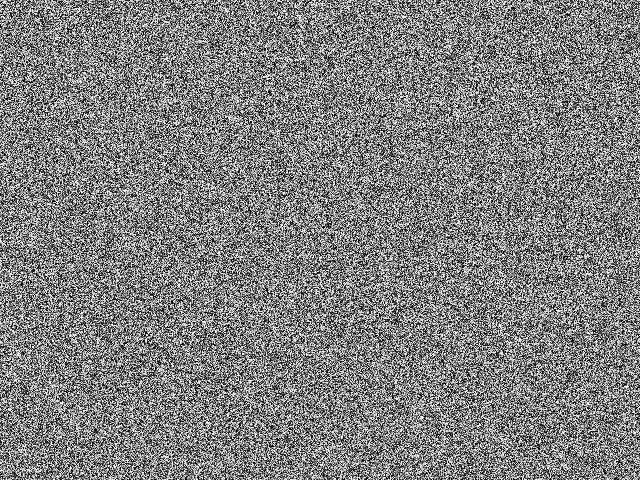

In [37]:
screenshot = np.array(screenshot_img)
screenshot_grey = cv2.cvtColor(screenshot, cv2.COLOR_BGR2GRAY)
convolution = signal.convolve2d(screenshot_grey, screenshot_cropped_grey_np, mode='same')
display(Image.fromarray(convolution))

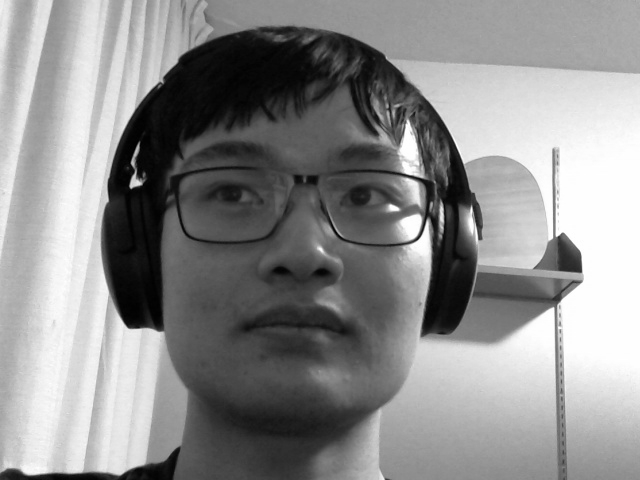

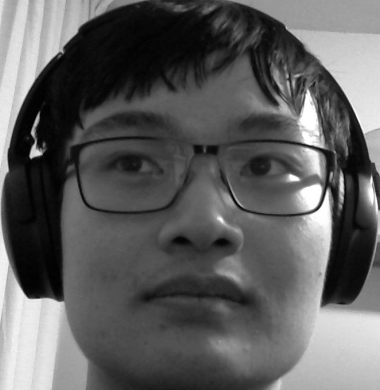

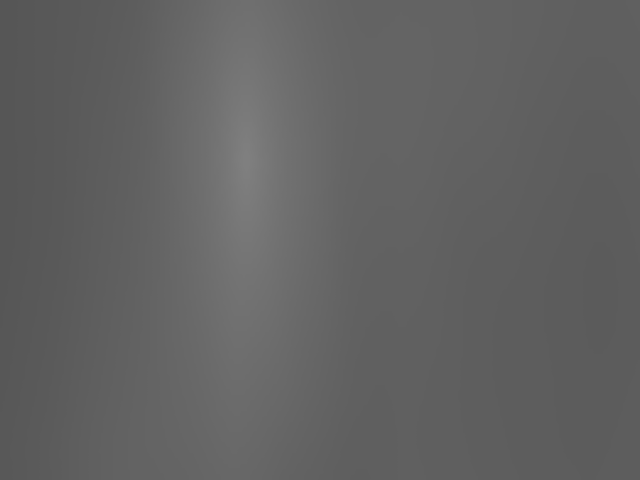

In [64]:
template_match = cv2.matchTemplate(screenshot_grey, screenshot_cropped_grey_np, cv2.TM_CCORR_NORMED)
display(Image.fromarray(screenshot_grey))
display(Image.fromarray(screenshot_cropped_grey_np))
display(Image.fromarray(cv2.resize((template_match * 128).astype(np.uint8), (screenshot_grey.shape[1], screenshot_grey.shape[0]))))
# display(template_match + 128)